<a href="https://colab.research.google.com/github/vijayareddy2002/fmml20220092/blob/main/Copy_of_Copy_of_FMML_Aug22_M1Lab2_DataFeatures%26Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## FMML Module 1, Lab 2<br>
Module Coordinator : amit.pandey@research.iiit.ac.in <br>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### The aim of this lab is to introduce DATA and FEATURES.
We will study: Feature extraction and Data Augmentation.
Let's get started.



Make a copy before running the cells

### Data can be anything like text, image , sound signals, and even a mix of multiple types (multimodal). We need to learn how to handle raw data, and how to use them for our analysis.

# Extracting features from data


 



In [2]:
## Standard Imports.

! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams 
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=ac9d1be3edeb9fb51e3e2dde8ad68780ca38feaf8c1bf1df51df438640ebd456
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


## What are features? 
### Features are individual independent variables that act like an input to your system. 
A very basic example is: In z = x + y, x and y are the features.
We can have simple features like above or even more complex features learned by our machine learning models (we will study these later on).

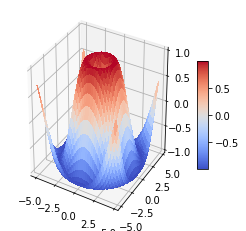

In [3]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

from mpl_toolkits.mplot3d.axes3d import get_test_data

 
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(1))

# =============
# First subplot
# =============
# set up the axes for the first plot
ax = fig.add_subplot(1, 1, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo
X = np.arange(-5, 5, 0.25) # feature 1
Y = np.arange(-5, 5, 0.25) # feature 2
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R) #output
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0.4, antialiased=False)
ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=10)

# Part 2: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features.They are converted into vectors (embeddings) or one hot encoded.  Let us explore a simple way of converting text to features. 

Let us download a few documents off Wikipedia.

text--->features---->vectors

In [4]:
## set language and then download the data.

topic1 = 'Goat Mountain'
topic2 = 'Elephant'
wikipedia.set_lang('en') 
eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content
wikipedia.set_lang('fr')
fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content



This is what the text looks like:

In [5]:
fr1 ## the french textual data describing the second topic.

"Goat Mountain est un sommet volcanique des monts Chisos, aux États-Unis. Il culmine à 1 410 mètres d'altitude dans le comté de Brewster, au Texas. Il est protégé au sein du parc national de Big Bend.\n\n\n== Notes et références ==\n\n\n== Liens externes ==\n\nRessources relatives à la géographie : Peakbagger.com SummitPost (en) Geographic Names Information System \n(en) Goat Mountain sur Natural Atlas Portail de la montagne   Portail du volcanisme   Portail du Texas"

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [6]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters, i.e. if not a-z then replace with space.
  return text

In [7]:
print(cleanup(fr1))

goatmountainestunsommetvolcaniquedesmontschisosauxtatsunisilculminemtresdaltitudedanslecomtdebrewsterautexasilestprotgauseinduparcnationaldebigbendnotesetrfrencesliensexternesressourcesrelativeslagographiepeakbaggercomsummitpostengeographicnamesinformationsystemengoatmountainsurnaturalatlasportaildelamontagneportailduvolcanismeportaildutexas


In [8]:
text1 = re.sub('[a-z]', '1', 'espèce d\'« éléphant d\?Afrique »,')
text1

"111è11 1'« é1é11111 1\\?A111111 »,"

In [9]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [10]:
print(eng1)

themountaingoatoreamnosamericanusalsoknownastherockymountaingoatisahoofedmammalendemictomountainousareasofwesternnorthamericaasubalpinetoalpinespeciesitisasurefootedclimbercommonlyseenoncliffsandicedespiteitsvernacularnameandbothgenerabeinginthesamesubfamilycaprinaethemountaingoatisnotamemberofcaprathegenusthatincludesallothergoatssuchasthewildgoatcapraaegagrusfromwhichthedomesticgoatisderivedinsteaditismorecloselyalliedwiththetakinsbudorcasandchamoisrupicapraclassificationandevolutionthemountaingoatisaneventoedungulateoftheorderartiodactylaandthefamilybovidaethatincludesantelopesgazellesandcattleitbelongstothesubfamilycaprinaealongwithtruegoatswildsheepthechamoisthemuskoxandotherspeciesthetakinsofthehimalayanregionwhilenotasisterlineageofthemountaingoatarenonethelessverycloselyrelatedandalmostcoevaltothemountaingoattheyevolvedinparallelfromanancestralgoatothermembersofthisgrouparethebharalthetruegoatsandthehimalayantahrthesheeplineageisalsoverycloselyrelatedwhilethemuskoxlineageissome

Instead of directly using characters as the features, to understand a text better, we may consider group of tokens i.e. ngrams as features.
 
For this example let us consider that each character is one word, and let us see how n-grams work.


## nltk library provides many tools for text processing, please explore them.

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on. 

Let us count the frequency of each character in a text and plot it in a histogram.

In [11]:
## Dont worry if you do not understand these functions right away, you can revisit them and follow step-by-step.

# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys()) 
  print("keys is :",keys)
  values = list(ngram.values())
  print("values is :",values)
  
  # sort the keys in alphabetic order
  combined = zip(keys, values) ## keys i.e. characters on x axis and their count in the given doc as values.
  print("combined is :",combined)
  zipped_sorted = sorted(combined, key=lambda x: x[0]) ## sorting based on keys, to get a to z order.
  keys, values = map(list, zip(*zipped_sorted))
  print("keys after sorting:",keys)
  print("values after sorting :",values)
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

Counter({('e',): 1073, ('t',): 830, ('a',): 811, ('n',): 724, ('o',): 712, ('i',): 680, ('s',): 606, ('r',): 546, ('l',): 440, ('h',): 413, ('d',): 297, ('m',): 284, ('c',): 261, ('g',): 255, ('u',): 238, ('f',): 182, ('p',): 164, ('b',): 141, ('y',): 139, ('w',): 112, ('v',): 111, ('k',): 60, ('x',): 15, ('z',): 8, ('j',): 6, ('q',): 2})
keys is : ['t', 'h', 'e', 'm', 'o', 'u', 'n', 'a', 'i', 'g', 'r', 's', 'c', 'l', 'k', 'w', 'y', 'f', 'd', 'b', 'p', 'v', 'z', 'x', 'j', 'q']
values is : [830, 413, 1073, 284, 712, 238, 724, 811, 680, 255, 546, 606, 261, 440, 60, 112, 139, 182, 297, 141, 164, 111, 8, 15, 6, 2]
combined is : <zip object at 0x7f21638bcf50>
keys after sorting: ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
values after sorting : [811, 141, 261, 297, 1073, 182, 255, 413, 680, 6, 60, 440, 284, 724, 712, 164, 2, 546, 606, 830, 238, 111, 112, 15, 139, 8]


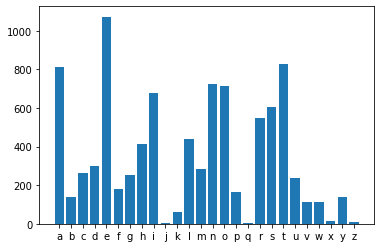

In [12]:
## we passed ngrams 'n' as 1 to get unigrams. Unigram is nothing but single token (in this case character).
## ngrams imported from nltk, it returns ngrams from given string. Counter returns dictionary with keys as elements and counts as values.
unigram_eng1 = Counter(ngrams(eng1,1))
print(unigram_eng1) ##just to get count of each element. 
plothistogram(unigram_eng1)
#plt.title('English 1')
#plt.show()
#unigram_eng2 = Counter(ngrams(eng2,1))
#plothistogram(unigram_eng2)
#plt.title('English 2')
#plt.show()

keys is : ['t', 'h', 'e', 'm', 'o', 'u', 'n', 'a', 'i', 'g', 'r', 's', 'c', 'l', 'k', 'w', 'y', 'f', 'd', 'b', 'p', 'v', 'z', 'x', 'j', 'q']
values is : [830, 413, 1073, 284, 712, 238, 724, 811, 680, 255, 546, 606, 261, 440, 60, 112, 139, 182, 297, 141, 164, 111, 8, 15, 6, 2]
combined is : <zip object at 0x7f2145895190>
keys after sorting: ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
values after sorting : [811, 141, 261, 297, 1073, 182, 255, 413, 680, 6, 60, 440, 284, 724, 712, 164, 2, 546, 606, 830, 238, 111, 112, 15, 139, 8]


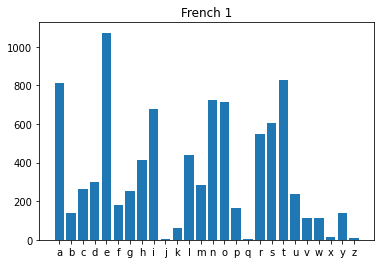

keys is : ['l', 'e', 's', 'p', 'h', 'a', 'n', 't', 'o', 'd', 'm', 'i', 'f', 'r', 'b', 'c', 'u', 'j', 'x', 'g', 'v', 'q', 'y', 'k', 'z', 'w']
values is : [1910, 4399, 2602, 1041, 438, 2211, 2308, 2139, 1530, 1254, 864, 1877, 342, 1939, 269, 895, 1602, 62, 126, 325, 281, 274, 75, 35, 25, 9]
combined is : <zip object at 0x7f21457da050>
keys after sorting: ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
values after sorting : [2211, 269, 895, 1254, 4399, 342, 325, 438, 1877, 62, 35, 1910, 864, 2308, 1530, 1041, 274, 1939, 2602, 2139, 1602, 281, 9, 126, 75, 25]


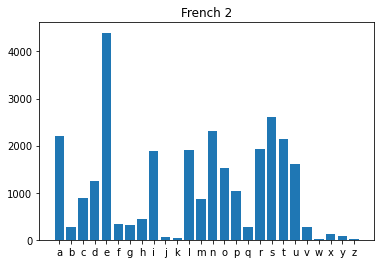

In [13]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

## A good feature is one that helps in easy prediction and classification. 
## for ex : if you wish to differentiate between grapes and apples, size can be one of the useful features.

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

keys is : ['th', 'he', 'em', 'mo', 'ou', 'un', 'nt', 'ta', 'ai', 'in', 'ng', 'go', 'oa', 'at', 'to', 'or', 're', 'ea', 'am', 'mn', 'no', 'os', 'sa', 'me', 'er', 'ri', 'ic', 'ca', 'an', 'nu', 'us', 'al', 'ls', 'so', 'ok', 'kn', 'ow', 'wn', 'na', 'as', 'st', 'ro', 'oc', 'ck', 'ky', 'ym', 'ti', 'is', 'ah', 'ho', 'oo', 'of', 'fe', 'ed', 'dm', 'ma', 'mm', 'le', 'en', 'nd', 'de', 'mi', 'ct', 'om', 'ar', 'fw', 'we', 'es', 'te', 'rn', 'nn', 'rt', 'ha', 'aa', 'su', 'ub', 'ba', 'lp', 'pi', 'ne', 'et', 'sp', 'pe', 'ec', 'ci', 'ie', 'si', 'it', 'ur', 'ef', 'fo', 'ot', 'dc', 'cl', 'li', 'im', 'mb', 'be', 'rc', 'co', 'on', 'nl', 'ly', 'ys', 'se', 'ee', 'nc', 'if', 'ff', 'fs', 'di', 'ce', 'ei', 'ts', 'sv', 've', 'ac', 'cu', 'ul', 'la', 'db', 'bo', 'hg', 'ge', 'ra', 'ab', 'gi', 'bf', 'fa', 'il', 'yc', 'ap', 'pr', 'ae', 'sn', 'fc', 'eg', 'lu', 'ud', 'll', 'lo', 'rg', 'ss', 'uc', 'ch', 'ew', 'wi', 'ld', 'dg', 'tc', 'ga', 'ag', 'gr', 'ru', 'sf', 'fr', 'mw', 'wh', 'hi', 'ht', 'do', 'cg', 'sd', 'iv', 'ns',

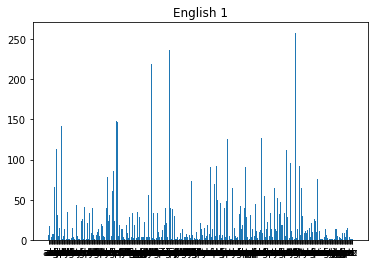

keys is : ['el', 'le', 'ep', 'ph', 'ha', 'an', 'nt', 'ts', 'sa', 'ar', 're', 'et', 'th', 'he', 'la', 'rg', 'ge', 'es', 'st', 'te', 'ex', 'xi', 'is', 'ti', 'in', 'ng', 'gl', 'nd', 'da', 'ni', 'im', 'ma', 'al', 'ls', 'hr', 'ee', 'li', 'iv', 'vi', 'gs', 'sp', 'pe', 'ec', 'ci', 'ie', 'cu', 'ur', 'rr', 'en', 'tl', 'ly', 'yr', 'co', 'og', 'gn', 'se', 'ed', 'dt', 'ea', 'af', 'fr', 'ri', 'ic', 'ca', 'nb', 'bu', 'us', 'sh', 'tt', 'nf', 'fo', 'or', 'ta', 'as', 'si', 'ia', 'ne', 'ey', 'ya', 'eo', 'on', 'nl', 'ys', 'su', 'rv', 'gm', 'me', 'em', 'mb', 'be', 'er', 'rs', 'so', 'of', 'ft', 'ef', 'fa', 'am', 'mi', 'il', 'ye', 'id', 'ae', 'rd', 'de', 'rp', 'pr', 'ro', 'ob', 'bo', 'os', 'sc', 'at', 'rw', 'wa', 'sf', 'rm', 'rl', 'ym', 'mu', 'uc', 'ch', 'hm', 'mo', 'di', 've', 'du', 'gt', 'pl', 'ei', 'to', 'oc', 'ce', 'eb', 'ut', 'tm', 'sb', 'xt', 'nc', 'ct', 'td', 'po', 'hd', 'fe', 'tu', 'cl', 'lu', 'ud', 'lo', 'gp', 'll', 'tr', 'ru', 'un', 'nk', 'kt', 'sk', 'ks', 'sl', 'rf', 'fl', 'ap', 'ps', 'pi', 'ik',

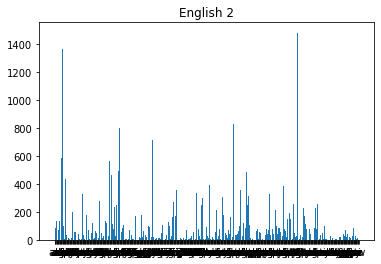

keys is : ['th', 'he', 'em', 'mo', 'ou', 'un', 'nt', 'ta', 'ai', 'in', 'ng', 'go', 'oa', 'at', 'to', 'or', 're', 'ea', 'am', 'mn', 'no', 'os', 'sa', 'me', 'er', 'ri', 'ic', 'ca', 'an', 'nu', 'us', 'al', 'ls', 'so', 'ok', 'kn', 'ow', 'wn', 'na', 'as', 'st', 'ro', 'oc', 'ck', 'ky', 'ym', 'ti', 'is', 'ah', 'ho', 'oo', 'of', 'fe', 'ed', 'dm', 'ma', 'mm', 'le', 'en', 'nd', 'de', 'mi', 'ct', 'om', 'ar', 'fw', 'we', 'es', 'te', 'rn', 'nn', 'rt', 'ha', 'aa', 'su', 'ub', 'ba', 'lp', 'pi', 'ne', 'et', 'sp', 'pe', 'ec', 'ci', 'ie', 'si', 'it', 'ur', 'ef', 'fo', 'ot', 'dc', 'cl', 'li', 'im', 'mb', 'be', 'rc', 'co', 'on', 'nl', 'ly', 'ys', 'se', 'ee', 'nc', 'if', 'ff', 'fs', 'di', 'ce', 'ei', 'ts', 'sv', 've', 'ac', 'cu', 'ul', 'la', 'db', 'bo', 'hg', 'ge', 'ra', 'ab', 'gi', 'bf', 'fa', 'il', 'yc', 'ap', 'pr', 'ae', 'sn', 'fc', 'eg', 'lu', 'ud', 'll', 'lo', 'rg', 'ss', 'uc', 'ch', 'ew', 'wi', 'ld', 'dg', 'tc', 'ga', 'ag', 'gr', 'ru', 'sf', 'fr', 'mw', 'wh', 'hi', 'ht', 'do', 'cg', 'sd', 'iv', 'ns',

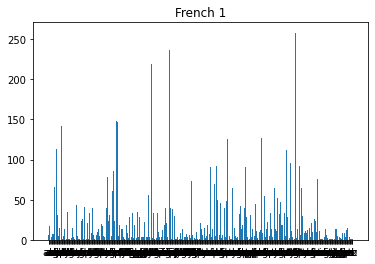

keys is : ['le', 'es', 'sl', 'lp', 'ph', 'ha', 'an', 'nt', 'ts', 'ss', 'so', 'on', 'td', 'de', 'sm', 'ma', 'am', 'mm', 'mi', 'if', 'fr', 're', 'sp', 'pr', 'ro', 'ob', 'bo', 'os', 'sc', 'ci', 'id', 'di', 'ie', 'en', 'ns', 'sd', 'el', 'la', 'af', 'fa', 'il', 'll', 'ed', 'ti', 'ds', 'si', 'ls', 'co', 'or', 'rr', 'po', 'nd', 'ta', 'au', 'uj', 'jo', 'ou', 'ur', 'rd', 'dh', 'hu', 'ui', 'it', 'tr', 'oi', 'is', 'se', 'pc', 'ce', 'sr', 'rp', 'pa', 'ar', 'rt', 'eu', 'ux', 'xg', 'ge', 'nr', 'st', 'in', 'nc', 'ct', 'sa', 'av', 'va', 'ne', 'da', 'ri', 'iq', 'qu', 'ue', 'ee', 'et', 'tl', 'ef', 'fo', 'ea', 'ut', 'eg', 'gr', 'up', 'ps', 'us', 'me', 'dl', 'ap', 'pp', 'nn', 'ug', 'lo', 'ox', 'xo', 'od', 'do', 'at', 'sq', 'as', 'em', 'pe', 'na', 'ep', 'ff', 'tp', 'rc', 'er', 'ai', 'ca', 'ra', 'ac', 'to', 'om', 'te', 'ng', 'gn', 'al', 'pl', 'lu', 've', 'ec', 'cd', 'ei', 'un', 'du', 'ub', 'mp', 'su', 'rv', 'vi', 'iv', 'sf', 'oc', 'bj', 'je', 'og', 'ud', 'oj', 'uc', 'io', 'ot', 'nl', 'mo', 'tf', 'tv', 'um',

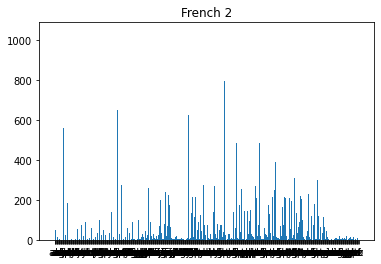

In [14]:
## Now instead of unigram, we will use bigrams as features, and see how useful bigrams are as features.

bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [15]:
## lets have a lot at bigrams.

bigram_eng1


Counter({('t', 'h'): 258,
         ('h', 'e'): 219,
         ('e', 'm'): 67,
         ('m', 'o'): 91,
         ('o', 'u'): 91,
         ('u', 'n'): 65,
         ('n', 't'): 126,
         ('t', 'a'): 96,
         ('a', 'i'): 66,
         ('i', 'n'): 237,
         ('n', 'g'): 131,
         ('g', 'o'): 54,
         ('o', 'a'): 64,
         ('a', 't'): 142,
         ('t', 'o'): 92,
         ('o', 'r'): 92,
         ('r', 'e'): 127,
         ('e', 'a'): 95,
         ('a', 'm'): 31,
         ('m', 'n'): 7,
         ('n', 'o'): 40,
         ('o', 's'): 37,
         ('s', 'a'): 65,
         ('m', 'e'): 48,
         ('e', 'r'): 148,
         ('r', 'i'): 55,
         ('i', 'c'): 39,
         ('c', 'a'): 43,
         ('a', 'n'): 151,
         ('n', 'u'): 9,
         ('u', 's'): 24,
         ('a', 'l'): 113,
         ('l', 's'): 21,
         ('s', 'o'): 52,
         ('o', 'k'): 5,
         ('k', 'n'): 3,
         ('o', 'w'): 29,
         ('w', 'n'): 3,
         ('n', 'a'): 69,
         ('a', 's'):

In [16]:
## a function to plot 2-D histogram. The values are color mapped. 
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))] #ord converts char to code
  plt.imshow(freq, cmap = 'jet')
  plt.colorbar()
  return freq

In [17]:
ord

<function ord(c, /)>

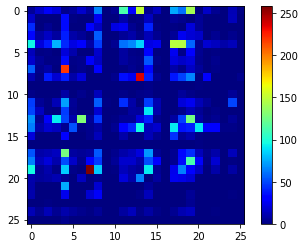

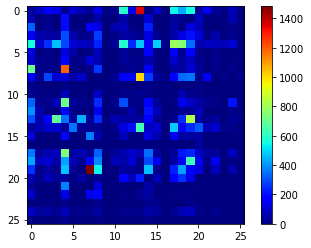

In [18]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

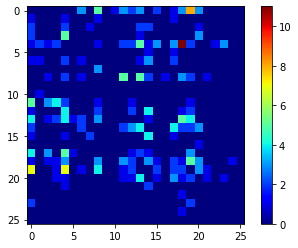

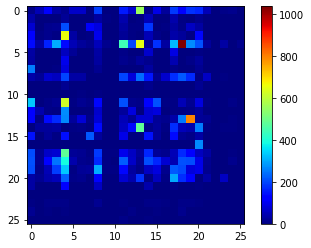

In [19]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

Let us look at the top 10 ngrams for each text. 

In [20]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')


In [21]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
('t', 'h') : 258.0
('i', 'n') : 237.0
('h', 'e') : 219.0
('a', 'n') : 151.0
('e', 'r') : 148.0
('e', 's') : 147.0
('a', 't') : 142.0
('n', 'g') : 131.0
('r', 'e') : 127.0
('n', 't') : 126.0

English 2:
('t', 'h') : 1482.0
('a', 'n') : 1366.0
('h', 'e') : 1194.0
('i', 'n') : 1013.0
('n', 't') : 828.0
('e', 'r') : 803.0
('e', 's') : 759.0
('r', 'e') : 755.0
('l', 'e') : 720.0
('h', 'a') : 715.0

French 1:
('e', 's') : 11.0
('a', 't') : 8.0
('t', 'e') : 7.0
('t', 'a') : 7.0
('n', 's') : 5.0
('r', 'e') : 5.0
('l', 'a') : 5.0
('a', 'i') : 5.0
('d', 'e') : 5.0
('i', 'n') : 5.0

French 2:
('e', 's') : 1036.0
('n', 't') : 795.0
('d', 'e') : 657.0
('e', 'n') : 650.0
('l', 'e') : 625.0
('a', 'n') : 557.0
('r', 'e') : 485.0
('o', 'n') : 484.0
('e', 'l') : 442.0
('s', 'e') : 390.0


## At times, we need to reduce the number of features. We will discuss this more in the upcoming sessions, but a small example has been discussed here. Instead of using each unique token (a word) as a feature, we reduced the number of features by using 1-gram and 2-gram of characters as features.

We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics. 

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

In [22]:
topic1 = 'Leopard'
topic2 = 'Lions'
wikipedia.set_lang('en') #latin
eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content
wikipedia.set_lang('el')#greek
fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content

In [23]:
print(fr1)
print(fr2)
print(cleanup(eng1))
print("-----------------------")
print(cleanup(fr1))
print("-----------------------")
print(cleanup(fr2))

Το Nissan Leopard ήταν ένα σπορ πολυτελές αυτοκίνητο, που παρήχθη από την ιαπωνική αυτοκινητοβιομηχανία Nissan μεταξύ του 1980 και του 1999, σε 4 γενιές.


== Πρώτη γενιά (F30) ==
Η πρώτη γενιά του Leopard, γνωστή και ως Leopard TR-X, κυκλοφόρησε τον Σεπτέμβριο του 1980, με σκοπό να εισέλθει ανταγωνιστικά στην κατηγορία των μεγαλομεσαίων αυτοκινήτων, και η παραγωγή της συνεχίστηκε έως το 1986. Κυκλοφόρησε σε δύο εκδόσεις, 2-πορτο κουπέ και 4-πορτο σεντάν, διαθέτοντας στον εξοπλισμό του πρωτοποριακά για την εποχή συστήματα, όπως έναν μετρητή κατανάλωσης καυσίμων στο ταμπλό.
Αρχικά το Leopard κυκλοφόρησε με 4-κύλινδρους και 6-κύλινδρους κινητήρες, με χωρητικότητες 1.800 cm³ με 105 ίππους, 2.000 cm³ με 125 ίππους και 2.800 cm³ με 155 ίππους. Τον Σεπτέμβριο του 1982, έγινε και ένας μικρός επανασχεδιασμός του αυτοκινήτου, ενώ προστέθηκε και ένας τούρμπο κινητήρας με χωρητικότητα 2.000 cm³ και ισχύ 145 ίππων.
Ο τελευταίος κινητήρας που προστέθηκε και ο μεγαλύτερος από όλους σε κυβισμό και ισ

keys is : ['L', 'e', 'o', 'n', 'a', 'r', 'd', ' ', 'i', 's', 'c', 'm', 'E', 'g', 'l', 'h', 'u', 'v', '.', '\n', 'T', 't', 'f', 'O', 'H', 'G', 'p', 'x', '(', '"', ')', 'k', 'Λ', 'έ', 'ω', 'ν', ',', 'b', 'y', '-', 'w', 'S', 'M', 'A', 'I', "'", 'j', '1', '2', '7', '4', '9', 'U', '=', 'V', ':', 'D', 'z', 'é', 'á', 'C', 'F', 'R', 'ó', '[', 'ɔ', 'ʁ', ']', ';', 'ā', 'W', 'P', 'B', 'q', 'Լ', 'ե', 'ո', 'ն', 'ա', 'ր', 'դ', 'ლ', 'ე', 'ო', 'ნ', 'ა', 'რ', 'დ', 'ε', 'ο', 'ά', 'ρ', 'δ', 'ς', 'ל', 'ֵ', 'ב', '־', 'א', 'ֲ', 'ר', 'ִ', 'י', 'N', 'Л', 'е', 'о', 'н', 'а', 'р', 'д', 'Y', 'ע', 'ָ', 'נ', 'ַ', 'ד', '5', '–', '8', '0', '6', '3', 'J', 'K', '&', 'Z']
values is : [267, 790, 669, 822, 810, 755, 359, 1195, 589, 303, 268, 204, 25, 100, 291, 220, 140, 37, 22, 253, 25, 365, 97, 8, 26, 27, 114, 10, 144, 28, 144, 43, 2, 1, 1, 2, 218, 133, 75, 15, 35, 54, 33, 100, 17, 7, 12, 152, 52, 30, 28, 122, 3, 47, 6, 25, 15, 11, 13, 5, 30, 18, 27, 1, 1, 1, 1, 1, 2, 4, 21, 21, 38, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

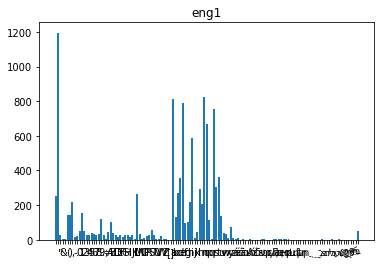

keys is : ['S', 'i', 'm', 'o', 'n', 's', ' ', 'a', 'u', 'r', 'e', 'f', 'c', 'd', 'v', 'g', 't', ',', 'p', 'y', 'w', 'h', '-', 'G', '*', 'z', 'ō', 'l', '"', '.', '\n', '=', 'N', 'b', 'A', '(', '1', '9', '6', '8', ')', 'W', 'k', 'x', 'R', '3', 'q', 'M', '7', '0', '–', '5', 'j', 'B', 'D', 'U', 'F', '4', 'C', 'T', 'I', 'E', 'J', '2', 'L', 'Z', 'H', 'K', 'Y', 'é', 'P', 'X']
values is : [116, 382, 214, 327, 376, 258, 616, 294, 78, 274, 270, 28, 152, 85, 18, 54, 184, 104, 52, 32, 26, 76, 7, 9, 2, 5, 1, 126, 2, 16, 163, 126, 10, 71, 53, 92, 125, 108, 28, 40, 92, 8, 14, 3, 17, 22, 1, 12, 29, 39, 38, 22, 11, 15, 19, 1, 5, 32, 19, 7, 2, 10, 17, 27, 6, 1, 9, 3, 3, 1, 6, 2]
combined is : <zip object at 0x7f21443f5a00>
keys after sorting: ['\n', ' ', '"', '(', ')', '*', ',', '-', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'R', 'S', 'T', 'U', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'

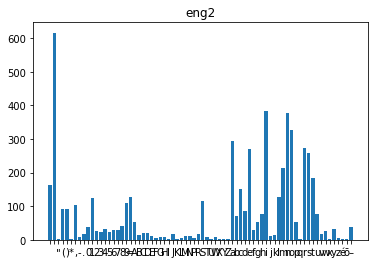

keys is : ['Τ', 'ο', ' ', 'N', 'i', 's', 'a', 'n', 'L', 'e', 'o', 'p', 'r', 'd', 'ή', 'τ', 'α', 'ν', 'έ', 'σ', 'π', 'ρ', 'λ', 'υ', 'ε', 'ς', 'κ', 'ί', 'η', ',', 'χ', 'θ', 'ό', 'ι', 'ω', 'β', 'μ', 'ξ', 'ύ', '1', '9', '8', '0', '4', 'γ', '.', '\n', '=', 'Π', 'ώ', 'ά', '(', 'F', '3', ')', 'Η', 'T', 'R', '-', 'X', 'φ', 'Σ', '6', 'Κ', 'δ', '2', 'Α', 'c', 'm', '³', '5', 'Ο', 'Z', 'ζ', 'u', 'b', 'G', 'E', 't', 'Ι', 'Δ', 'Ε', 'y', 'S', ':', 'C', 'Έ', 'U', 'B', 'O', 'P', 'D', 'I', 'A', 'Φ', 'Β', 'l', 'f', 'M', 'é', 'Γ', 'k', 'Ό', 'v', 'V', 'Χ', 'ψ', 'Ω', '7', 'Y', 'J', '«', '»', 'x', '·', 'g', 'H', "'", 'Υ', 'h', 'Μ', 'j']
values is : [11, 450, 1108, 29, 71, 54, 67, 50, 29, 51, 50, 30, 56, 33, 105, 462, 433, 314, 82, 208, 193, 210, 102, 146, 300, 126, 225, 102, 188, 62, 56, 32, 115, 325, 71, 17, 156, 19, 46, 37, 17, 16, 82, 10, 65, 57, 66, 20, 4, 21, 83, 10, 18, 37, 10, 13, 18, 14, 15, 21, 43, 5, 13, 1, 72, 37, 11, 14, 12, 6, 12, 5, 6, 13, 12, 4, 19, 16, 16, 7, 2, 7, 6, 21, 4, 13, 1, 6, 6, 6, 5

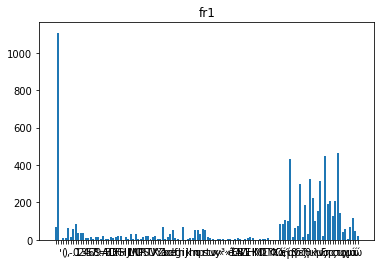

keys is : ['Η', ' ', 'L', 'i', 'o', 'n', 's', 'G', 'a', 't', 'e', 'F', 'l', 'm', 'ε', 'ί', 'ν', 'α', 'ι', 'μ', 'ρ', 'κ', 'ή', 'τ', 'π', 'γ', 'ω', 'ς', 'η', 'ο', 'φ', 'ώ', 'σ', 'E', 'r', 'έ', 'δ', 'Β', 'ύ', 'β', 'Σ', 'ά', 'Μ', 'ό', '.', '\n', '=', 'Τ', 'λ', 'ξ', 'Έ', 'h', '9', '/', '1', 'υ', 'A', 'c', 'P', 'y', 'M', 'H', 'χ', 'f', 'Ό', 'd', '8', 'D', 'g', 'Κ', 'θ', '2', '0', '4', 'R', 'w', '(', 'ψ', '3', ')', ',', 'C', 'ζ', '6', 'S', '$', 'ϋ', 'T', '5', 'W', 'I', 'Α', 'Π']
values is : [4, 187, 3, 8, 12, 12, 8, 3, 15, 9, 9, 2, 3, 4, 68, 20, 48, 77, 73, 26, 47, 47, 11, 65, 28, 14, 11, 30, 19, 59, 6, 5, 23, 1, 10, 16, 8, 1, 6, 4, 2, 10, 3, 15, 9, 7, 4, 2, 14, 6, 1, 4, 6, 1, 6, 25, 2, 3, 1, 2, 2, 2, 7, 3, 5, 4, 1, 1, 1, 1, 3, 5, 11, 3, 1, 3, 5, 1, 1, 5, 3, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1]
combined is : <zip object at 0x7f21457d9f00>
keys after sorting: ['\n', ' ', '$', '(', ')', ',', '.', '/', '0', '1', '2', '3', '4', '5', '6', '8', '9', '=', 'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'L', 

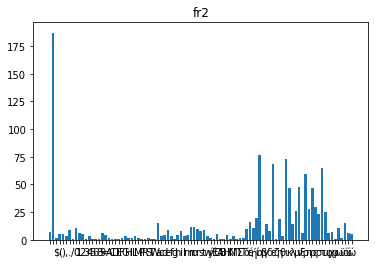

In [24]:
unigram_eng1 = Counter(ngrams(eng1,1))
unigram_eng2=Counter(ngrams(eng2,1))
plt.title("eng1")
plothistogram(unigram_eng1)
plt.show()
plt.title("eng2")
plothistogram(unigram_eng2)
plt.show()

unigram_eng1 = Counter(ngrams(fr1,1))
unigram_eng2=Counter(ngrams(fr2,1))
plt.title("fr1")
plothistogram(unigram_eng1)
plt.show()
plt.title("fr2")
plothistogram(unigram_eng2)
plt.show()

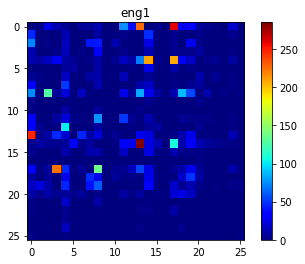

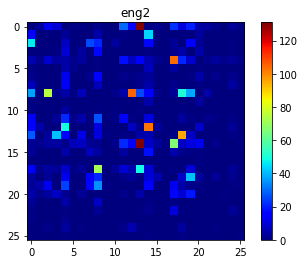

In [25]:
unigram_eng1 = Counter(ngrams(eng1,2))
unigram_eng2=Counter(ngrams(eng2,2))
plt.title("eng1")
plotbihistogram(unigram_eng1)
plt.show()
plt.title("eng2")
plotbihistogram(unigram_eng2)
plt.show()

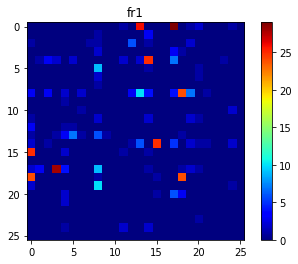

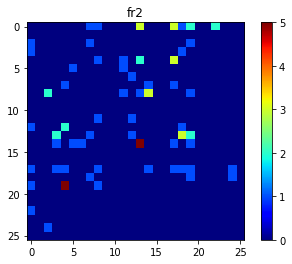

In [26]:
unigram_eng1 = Counter(ngrams(fr1,2))
unigram_eng2=Counter(ngrams(fr2,2))
plt.title("fr1")
plotbihistogram(unigram_eng1)
plt.show()
plt.title("fr2")
plotbihistogram(unigram_eng2)
plt.show()

keys is : ['Τ', 'ο', ' ', 'N', 'i', 's', 'a', 'n', 'L', 'e', 'o', 'p', 'r', 'd', 'ή', 'τ', 'α', 'ν', 'έ', 'σ', 'π', 'ρ', 'λ', 'υ', 'ε', 'ς', 'κ', 'ί', 'η', ',', 'χ', 'θ', 'ό', 'ι', 'ω', 'β', 'μ', 'ξ', 'ύ', '1', '9', '8', '0', '4', 'γ', '.', '\n', '=', 'Π', 'ώ', 'ά', '(', 'F', '3', ')', 'Η', 'T', 'R', '-', 'X', 'φ', 'Σ', '6', 'Κ', 'δ', '2', 'Α', 'c', 'm', '³', '5', 'Ο', 'Z', 'ζ', 'u', 'b', 'G', 'E', 't', 'Ι', 'Δ', 'Ε', 'y', 'S', ':', 'C', 'Έ', 'U', 'B', 'O', 'P', 'D', 'I', 'A', 'Φ', 'Β', 'l', 'f', 'M', 'é', 'Γ', 'k', 'Ό', 'v', 'V', 'Χ', 'ψ', 'Ω', '7', 'Y', 'J', '«', '»', 'x', '·', 'g', 'H', "'", 'Υ', 'h', 'Μ', 'j']
values is : [11, 450, 1108, 29, 71, 54, 67, 50, 29, 51, 50, 30, 56, 33, 105, 462, 433, 314, 82, 208, 193, 210, 102, 146, 300, 126, 225, 102, 188, 62, 56, 32, 115, 325, 71, 17, 156, 19, 46, 37, 17, 16, 82, 10, 65, 57, 66, 20, 4, 21, 83, 10, 18, 37, 10, 13, 18, 14, 15, 21, 43, 5, 13, 1, 72, 37, 11, 14, 12, 6, 12, 5, 6, 13, 12, 4, 19, 16, 16, 7, 2, 7, 6, 21, 4, 13, 1, 6, 6, 6, 5

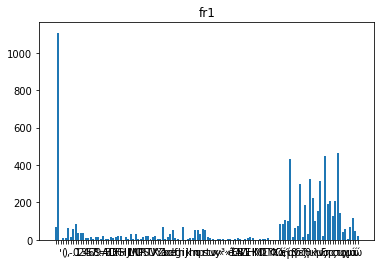

keys is : ['Η', ' ', 'L', 'i', 'o', 'n', 's', 'G', 'a', 't', 'e', 'F', 'l', 'm', 'ε', 'ί', 'ν', 'α', 'ι', 'μ', 'ρ', 'κ', 'ή', 'τ', 'π', 'γ', 'ω', 'ς', 'η', 'ο', 'φ', 'ώ', 'σ', 'E', 'r', 'έ', 'δ', 'Β', 'ύ', 'β', 'Σ', 'ά', 'Μ', 'ό', '.', '\n', '=', 'Τ', 'λ', 'ξ', 'Έ', 'h', '9', '/', '1', 'υ', 'A', 'c', 'P', 'y', 'M', 'H', 'χ', 'f', 'Ό', 'd', '8', 'D', 'g', 'Κ', 'θ', '2', '0', '4', 'R', 'w', '(', 'ψ', '3', ')', ',', 'C', 'ζ', '6', 'S', '$', 'ϋ', 'T', '5', 'W', 'I', 'Α', 'Π']
values is : [4, 187, 3, 8, 12, 12, 8, 3, 15, 9, 9, 2, 3, 4, 68, 20, 48, 77, 73, 26, 47, 47, 11, 65, 28, 14, 11, 30, 19, 59, 6, 5, 23, 1, 10, 16, 8, 1, 6, 4, 2, 10, 3, 15, 9, 7, 4, 2, 14, 6, 1, 4, 6, 1, 6, 25, 2, 3, 1, 2, 2, 2, 7, 3, 5, 4, 1, 1, 1, 1, 3, 5, 11, 3, 1, 3, 5, 1, 1, 5, 3, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1]
combined is : <zip object at 0x7f2144ecdb90>
keys after sorting: ['\n', ' ', '$', '(', ')', ',', '.', '/', '0', '1', '2', '3', '4', '5', '6', '8', '9', '=', 'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'L', 

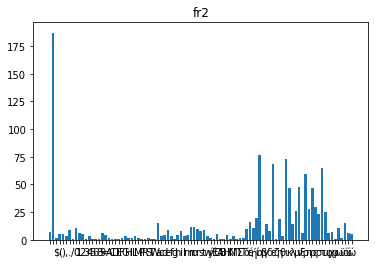

keys is : ['Το', 'ο ', ' N', 'Ni', 'is', 'ss', 'sa', 'an', 'n ', ' L', 'Le', 'eo', 'op', 'pa', 'ar', 'rd', 'd ', ' ή', 'ήτ', 'τα', 'αν', 'ν ', ' έ', 'έν', 'να', 'α ', ' σ', 'σπ', 'πο', 'ορ', 'ρ ', ' π', 'ολ', 'λυ', 'υτ', 'τε', 'ελ', 'λέ', 'ές', 'ς ', ' α', 'αυ', 'το', 'οκ', 'κί', 'ίν', 'νη', 'ητ', 'ο,', ', ', 'ου', 'υ ', 'πα', 'αρ', 'ρή', 'ήχ', 'χθ', 'θη', 'η ', 'απ', 'πό', 'ό ', ' τ', 'τη', 'ην', ' ι', 'ια', 'πω', 'ων', 'νι', 'ικ', 'κή', 'ή ', 'κι', 'ιν', 'οβ', 'βι', 'ιο', 'ομ', 'μη', 'ηχ', 'χα', 'νί', 'ία', ' μ', 'με', 'ετ', 'αξ', 'ξύ', 'ύ ', ' 1', '19', '98', '80', '0 ', ' κ', 'κα', 'αι', 'ι ', '99', '9,', 'σε', 'ε ', ' 4', '4 ', ' γ', 'γε', 'εν', 'ιέ', 'ς.', '.\n', '\n\n', '\n=', '==', '= ', ' Π', 'Πρ', 'ρώ', 'ώτ', 'ιά', 'ά ', ' (', '(F', 'F3', '30', '0)', ') ', ' =', '=\n', '\nΗ', 'Η ', 'πρ', 'd,', 'γν', 'νω', 'ωσ', 'στ', 'τή', ' ω', 'ως', ' T', 'TR', 'R-', '-X', 'X,', 'κυ', 'υκ', 'κλ', 'λο', 'οφ', 'φό', 'όρ', 'ρη', 'ησ', 'ον', ' Σ', 'Σε', 'επ', 'πτ', 'τέ', 'έμ', 'μβ', 'βρ', 'ρι',

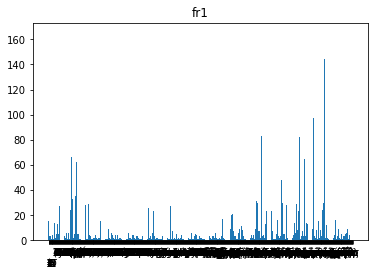

keys is : ['Η ', ' L', 'Li', 'io', 'on', 'ns', 's ', ' G', 'Ga', 'at', 'te', 'e ', ' F', 'Fi', 'il', 'lm', 'ms', ' ε', 'εί', 'ίν', 'να', 'αι', 'ι ', ' μ', 'μι', 'ια', 'α ', ' α', 'αμ', 'με', 'ερ', 'ρι', 'ικ', 'κα', 'αν', 'νι', 'κή', 'ή ', 'ετ', 'τα', 'ιρ', 'ρε', 'ία', ' π', 'πα', 'αρ', 'ρα', 'αγ', 'γω', 'ωγ', 'γή', 'ής', 'ς ', ' κ', 'κι', 'ιν', 'νη', 'ημ', 'μα', 'ατ', 'το', 'ογ', 'γρ', 'αφ', 'φι', 'κώ', 'ών', 'ν ', ' τ', 'ιώ', 'νή', 'ήκ', 'κε', 'ει', ' σ', 'στ', 'τη', 'η ', ' E', 'En', 'nt', 'er', 'rt', 'ta', 'ai', 'in', 'nm', 'me', 'en', 't ', 'ε ', ' έ', 'έδ', 'δρ', 'ο ', ' Β', 'Βα', 'νκ', 'κο', 'ού', 'ύβ', 'βε', 'ρ ', ' Σ', 'Σά', 'άν', 'ντ', ' Μ', 'Μό', 'όν', 'α.', '. ', ' \n', '\n\n', '\n=', '==', '= ', ' Τ', 'Τα', 'νί', 'ίε', 'ες', ' =', '=\n', '\nΗ', 'αλ', 'λα', 'μβ', 'βά', 'νε', 'εξ', 'ξά', 'άρ', 'ρτ', 'ητ', 'τε', ' ή', ' ξ', 'ξέ', 'έν', 'γέ', 'ές', 'ς.', ' Έ', 'Έγ', 'γι', ' γ', 'γν', 'νω', 'ωσ', 'τή', 'απ', 'πό', 'ό ', ' ν', 'οκ', 'ιμ', 'τέ', 'έρ', 'Fa', 'ah', 'hr', 're', 'nh',

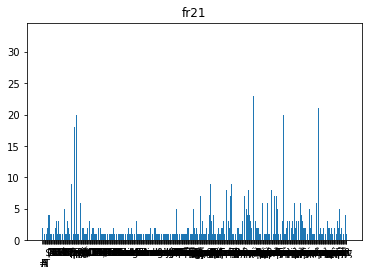

In [29]:
def tuple2string1(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string1(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram1(ngram):
  keys = key2string(ngram.keys()) 
  print("keys is :",keys)
  values = list(ngram.values())
  print("values is :",values)
  return keys,values

In [30]:
trigram_eng1 = Counter(ngrams(eng1,3))
keys,values=plothistogram1(trigram_eng1)
print(keys)
print(values)

keys is : ['Leo', 'eon', 'ona', 'nar', 'ard', 'rd ', 'd o', ' or', 'or ', 'r L', ' Le', 'eo ', 'o i', ' is', 'is ', 's a', ' a ', 'a c', ' co', 'com', 'omm', 'mmo', 'mon', 'on ', 'n E', ' En', 'Eng', 'ngl', 'gli', 'lis', 'ish', 'sh ', 'h m', ' ma', 'mas', 'asc', 'scu', 'cul', 'uli', 'lin', 'ine', 'ne ', 'e g', ' gi', 'giv', 'ive', 'ven', 'en ', 'n n', ' na', 'nam', 'ame', 'me ', 'e a', ' an', 'and', 'nd ', 'd a', 'a s', ' su', 'sur', 'urn', 'rna', 'me.', 'e.\n', '.\nT', '\nTh', 'The', 'he ', 'd s', 'e o', 'ori', 'rig', 'igi', 'gin', 'ina', 'nat', 'ate', 'te ', 'e f', ' fr', 'fro', 'rom', 'om ', 'm t', ' th', 'the', 'e O', ' Ol', 'Old', 'ld ', 'd H', ' Hi', 'Hig', 'igh', 'gh ', 'h G', ' Ge', 'Ger', 'erm', 'rma', 'man', 'an ', 'n L', 'onh', 'nha', 'har', 'd c', 'con', 'ont', 'nta', 'tai', 'ain', 'ini', 'nin', 'ing', 'ng ', 'g t', 'e p', ' pr', 'pre', 'ref', 'efi', 'fix', 'ix ', 'x l', ' le', 'lev', 'evo', 'von', 'n (', ' ("', '("l', '"li', 'lio', 'ion', 'on"', 'n")', '") ', ') f', 'e G',

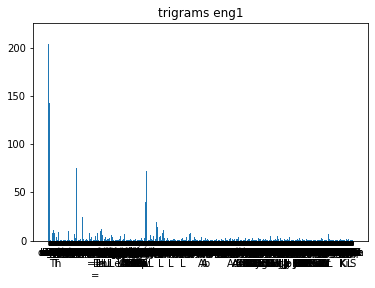

keys is : ['Sim', 'imo', 'mon', 'ons', 'ns ', 's i', ' is', 'is ', 's a', ' a ', 'a s', ' su', 'sur', 'urn', 'rna', 'nam', 'ame', 'me ', 'e o', ' of', 'of ', 'f S', ' Sc', 'Sca', 'can', 'and', 'ndi', 'din', 'ina', 'nav', 'avi', 'via', 'ian', 'an ', 'n o', ' or', 'ori', 'rig', 'igi', 'gin', 'ins', ' an', 'nd ', 'd a', 'a v', ' va', 'var', 'ari', 'ria', 'ant', 'nt ', 't o', ' Si', 'Sig', 'igm', 'gmu', 'mun', 'und', 'nds', 'dss', 'sso', 'son', 'on,', 'n, ', ', a', 'a p', ' pa', 'pat', 'atr', 'tro', 'ron', 'ony', 'nym', 'ymi', 'mic', 'ic ', 'c s', 'e w', ' wi', 'wit', 'ith', 'th ', 'h r', ' ro', 'roo', 'oot', 'ots', 'ts ', ' in', 'in ', 'n p', ' pr', 'pro', 'rot', 'oto', 'to-', 'o-G', '-Ge', 'Ger', 'erm', 'rma', 'man', 'ani', 'nic', 'c *', ' *s', '*se', 'seg', 'ega', 'gaz', 'az ', 'z a', 'd *', ' *m', '*mu', 'ndō', 'dō,', 'ō, ', ', g', ' gi', 'giv', 'ivi', 'vin', 'ing', 'ng ', 'g a', 'a r', 'rou', 'oug', 'ugh', 'gh ', 'h t', ' tr', 'tra', 'ran', 'ans', 'nsl', 'sla', 'lat', 'ati', 'tio', 'i

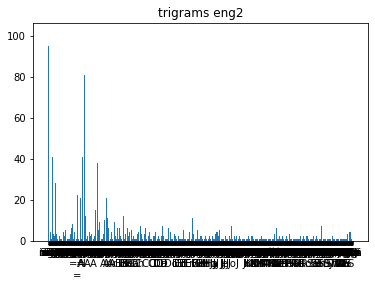

In [31]:
plt.bar(keys,values)
plt.title("trigrams eng1")
plt.show()
trigram_eng2 = Counter(ngrams(eng2,3))
keys1,values1=plothistogram1(trigram_eng2)
print(keys1)
print(values1)
plt.bar(keys1,values1)
plt.title("trigrams eng2")
plt.show()

keys is : ['Το ', 'ο N', ' Ni', 'Nis', 'iss', 'ssa', 'san', 'an ', 'n L', ' Le', 'Leo', 'eop', 'opa', 'par', 'ard', 'rd ', 'd ή', ' ήτ', 'ήτα', 'ταν', 'αν ', 'ν έ', ' έν', 'ένα', 'να ', 'α σ', ' σπ', 'σπο', 'πορ', 'ορ ', 'ρ π', ' πο', 'πολ', 'ολυ', 'λυτ', 'υτε', 'τελ', 'ελέ', 'λές', 'ές ', 'ς α', ' αυ', 'αυτ', 'υτο', 'τοκ', 'οκί', 'κίν', 'ίνη', 'νητ', 'ητο', 'το,', 'ο, ', ', π', 'που', 'ου ', 'υ π', ' πα', 'παρ', 'αρή', 'ρήχ', 'ήχθ', 'χθη', 'θη ', 'η α', ' απ', 'από', 'πό ', 'ό τ', ' τη', 'την', 'ην ', 'ν ι', ' ια', 'ιαπ', 'απω', 'πων', 'ωνι', 'νικ', 'ική', 'κή ', 'ή α', 'οκι', 'κιν', 'ινη', 'τοβ', 'οβι', 'βιο', 'ιομ', 'ομη', 'μηχ', 'ηχα', 'χαν', 'ανί', 'νία', 'ία ', 'α N', 'n μ', ' με', 'μετ', 'ετα', 'ταξ', 'αξύ', 'ξύ ', 'ύ τ', ' το', 'του', 'υ 1', ' 19', '198', '980', '80 ', '0 κ', ' κα', 'και', 'αι ', 'ι τ', '199', '999', '99,', '9, ', ', σ', ' σε', 'σε ', 'ε 4', ' 4 ', '4 γ', ' γε', 'γεν', 'ενι', 'νιέ', 'ιές', 'ές.', 'ς.\n', '.\n\n', '\n\n\n', '\n\n=', '\n==', '== ', '= Π', ' Πρ', 

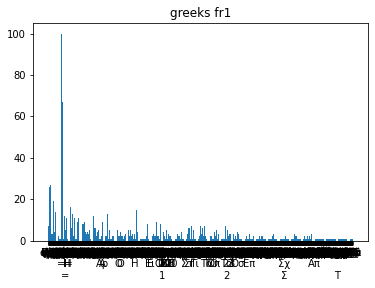

keys is : ['Η L', ' Li', 'Lio', 'ion', 'ons', 'ns ', 's G', ' Ga', 'Gat', 'ate', 'te ', 'e F', ' Fi', 'Fil', 'ilm', 'lms', 'ms ', 's ε', ' εί', 'είν', 'ίνα', 'ναι', 'αι ', 'ι μ', ' μι', 'μια', 'ια ', 'α α', ' αμ', 'αμε', 'μερ', 'ερι', 'ρικ', 'ικα', 'καν', 'ανι', 'νικ', 'ική', 'κή ', 'ή ε', ' ετ', 'ετα', 'ται', 'αιρ', 'ιρε', 'ρεί', 'εία', 'ία ', 'α π', ' πα', 'παρ', 'αρα', 'ραγ', 'αγω', 'γωγ', 'ωγή', 'γής', 'ής ', 'ς κ', ' κι', 'κιν', 'ινη', 'νημ', 'ημα', 'ματ', 'ατο', 'τογ', 'ογρ', 'γρα', 'ραφ', 'αφι', 'φικ', 'ικώ', 'κών', 'ών ', 'ν τ', ' τα', 'αιν', 'ινι', 'νιώ', 'ιών', 'ν κ', ' κα', 'και', 'ι α', ' αν', 'ανή', 'νήκ', 'ήκε', 'κει', 'ει ', 'ι σ', ' στ', 'στη', 'τη ', 'η L', 'e E', ' En', 'Ent', 'nte', 'ter', 'ert', 'rta', 'tai', 'ain', 'inm', 'nme', 'men', 'ent', 'nt ', 't μ', ' με', 'με ', 'ε έ', ' έδ', 'έδρ', 'δρα', 'ρα ', 'α τ', ' το', 'το ', 'ο Β', ' Βα', 'Βαν', 'ανκ', 'νκο', 'κού', 'ούβ', 'ύβε', 'βερ', 'ερ ', 'ρ κ', 'στο', 'ο Σ', ' Σά', 'Σάν', 'άντ', 'ντα', 'τα ', 'α Μ', ' Μό', 'Μ

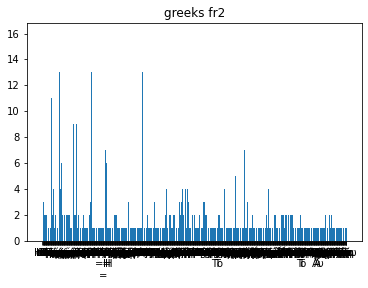

In [32]:
trigram_eng1 = Counter(ngrams(fr1,3))#trigrams greek
keys,values=plothistogram1(trigram_eng1)
print(keys)
print(values)
plt.bar(keys,values)
plt.title("greeks fr1")
plt.show()
trigram_eng1 = Counter(ngrams(fr2,3))
keys1,values1=plothistogram1(trigram_eng1)
print(keys1)
print(values1)
plt.bar(keys1,values1)
plt.title("greeks fr2")
plt.show()

enter no of grams14
m is : 14
keys is : ['Το Nissan Leop', 'ο Nissan Leopa', ' Nissan Leopar', 'Nissan Leopard', 'issan Leopard ', 'ssan Leopard ή', 'san Leopard ήτ', 'an Leopard ήτα', 'n Leopard ήταν', ' Leopard ήταν ', 'Leopard ήταν έ', 'eopard ήταν έν', 'opard ήταν ένα', 'pard ήταν ένα ', 'ard ήταν ένα σ', 'rd ήταν ένα σπ', 'd ήταν ένα σπο', ' ήταν ένα σπορ', 'ήταν ένα σπορ ', 'ταν ένα σπορ π', 'αν ένα σπορ πο', 'ν ένα σπορ πολ', ' ένα σπορ πολυ', 'ένα σπορ πολυτ', 'να σπορ πολυτε', 'α σπορ πολυτελ', ' σπορ πολυτελέ', 'σπορ πολυτελές', 'πορ πολυτελές ', 'ορ πολυτελές α', 'ρ πολυτελές αυ', ' πολυτελές αυτ', 'πολυτελές αυτο', 'ολυτελές αυτοκ', 'λυτελές αυτοκί', 'υτελές αυτοκίν', 'τελές αυτοκίνη', 'ελές αυτοκίνητ', 'λές αυτοκίνητο', 'ές αυτοκίνητο,', 'ς αυτοκίνητο, ', ' αυτοκίνητο, π', 'αυτοκίνητο, πο', 'υτοκίνητο, που', 'τοκίνητο, που ', 'οκίνητο, που π', 'κίνητο, που πα', 'ίνητο, που παρ', 'νητο, που παρή', 'ητο, που παρήχ', 'το, που παρήχθ', 'ο, που παρήχθη', ', που παρήχθη ', ' που

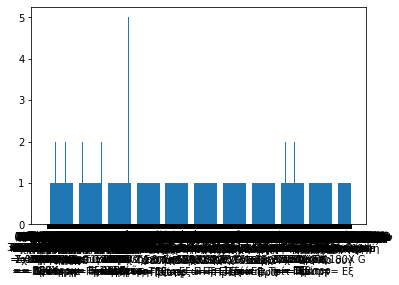

In [ ]:
m=int(input("enter no of grams"))#n grams for greek
print("m is :",m)
ngrams_1=Counter(ngrams(fr1,m))
keys,values=plothistogram1(ngrams_1)
combined = zip(keys, values) ## keys i.e. characters on x axis and their count in the given doc as values.
print("combined is :",combined)
zipped_sorted = sorted(combined, key=lambda x: x[0]) ## sorting based on keys, to get a to z order.
keys, values = map(list, zip(*zipped_sorted))
print("keys after sorting:",keys)
print("values after sorting :",values)
plt.bar(keys, values)
plt.show()


enter no of grams14
m is : 14
keys is : ['Η Lions Gate F', ' Lions Gate Fi', 'Lions Gate Fil', 'ions Gate Film', 'ons Gate Films', 'ns Gate Films ', 's Gate Films ε', ' Gate Films εί', 'Gate Films είν', 'ate Films είνα', 'te Films είναι', 'e Films είναι ', ' Films είναι μ', 'Films είναι μι', 'ilms είναι μια', 'lms είναι μια ', 'ms είναι μια α', 's είναι μια αμ', ' είναι μια αμε', 'είναι μια αμερ', 'ίναι μια αμερι', 'ναι μια αμερικ', 'αι μια αμερικα', 'ι μια αμερικαν', ' μια αμερικανι', 'μια αμερικανικ', 'ια αμερικανική', 'α αμερικανική ', ' αμερικανική ε', 'αμερικανική ετ', 'μερικανική ετα', 'ερικανική εται', 'ρικανική εταιρ', 'ικανική εταιρε', 'κανική εταιρεί', 'ανική εταιρεία', 'νική εταιρεία ', 'ική εταιρεία π', 'κή εταιρεία πα', 'ή εταιρεία παρ', ' εταιρεία παρα', 'εταιρεία παραγ', 'ταιρεία παραγω', 'αιρεία παραγωγ', 'ιρεία παραγωγή', 'ρεία παραγωγής', 'εία παραγωγής ', 'ία παραγωγής κ', 'α παραγωγής κι', ' παραγωγής κιν', 'παραγωγής κινη', 'αραγωγής κινημ', 'ραγωγής κινημα', 'αγωγ

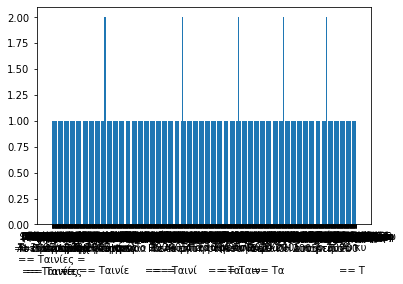

In [34]:
m=int(input("enter no of grams"))#n grams for greek
print("m is :",m)
ngrams_1=Counter(ngrams(fr2,m))
keys,values=plothistogram1(ngrams_1)
combined = zip(keys, values) ## keys i.e. characters on x axis and their count in the given doc as values.
print("combined is :",combined)
zipped_sorted = sorted(combined, key=lambda x: x[0]) ## sorting based on keys, to get a to z order.
keys, values = map(list, zip(*zipped_sorted))
print("keys after sorting:",keys)
print("values after sorting :",values)
plt.bar(keys, values)
plt.show()

enter no of grams12
m is : 12
keys is : ['Leonard or L', 'eonard or Le', 'onard or Leo', 'nard or Leo ', 'ard or Leo i', 'rd or Leo is', 'd or Leo is ', ' or Leo is a', 'or Leo is a ', 'r Leo is a c', ' Leo is a co', 'Leo is a com', 'eo is a comm', 'o is a commo', ' is a common', 'is a common ', 's a common E', ' a common En', 'a common Eng', ' common Engl', 'common Engli', 'ommon Englis', 'mmon English', 'mon English ', 'on English m', 'n English ma', ' English mas', 'English masc', 'nglish mascu', 'glish mascul', 'lish masculi', 'ish masculin', 'sh masculine', 'h masculine ', ' masculine g', 'masculine gi', 'asculine giv', 'sculine give', 'culine given', 'uline given ', 'line given n', 'ine given na', 'ne given nam', 'e given name', ' given name ', 'given name a', 'iven name an', 'ven name and', 'en name and ', 'n name and a', ' name and a ', 'name and a s', 'ame and a su', 'me and a sur', 'e and a surn', ' and a surna', 'and a surnam', 'nd a surname', 'd a surname.', ' a surname.\n'

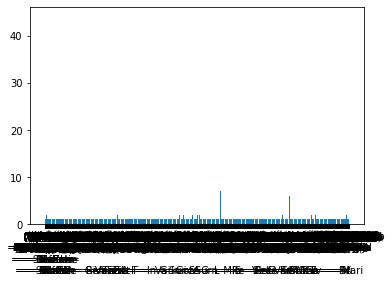

In [35]:
m=int(input("enter no of grams"))#n grams for english
print("m is :",m)
ngrams_1=Counter(ngrams(eng1,m))
keys,values=plothistogram1(ngrams_1)
combined = zip(keys, values) ## keys i.e. characters on x axis and their count in the given doc as values.
print("combined is :",combined)
zipped_sorted = sorted(combined, key=lambda x: x[0]) ## sorting based on keys, to get a to z order.
keys, values = map(list, zip(*zipped_sorted))
print("keys after sorting:",keys)
print("values after sorting :",values)
plt.bar(keys, values)
plt.show()


enter no of grams13
m is : 13
keys is : ['Simons is a s', 'imons is a su', 'mons is a sur', 'ons is a surn', 'ns is a surna', 's is a surnam', ' is a surname', 'is a surname ', 's a surname o', ' a surname of', 'a surname of ', ' surname of S', 'surname of Sc', 'urname of Sca', 'rname of Scan', 'name of Scand', 'ame of Scandi', 'me of Scandin', 'e of Scandina', ' of Scandinav', 'of Scandinavi', 'f Scandinavia', ' Scandinavian', 'Scandinavian ', 'candinavian o', 'andinavian or', 'ndinavian ori', 'dinavian orig', 'inavian origi', 'navian origin', 'avian origins', 'vian origins ', 'ian origins a', 'an origins an', 'n origins and', ' origins and ', 'origins and a', 'rigins and a ', 'igins and a v', 'gins and a va', 'ins and a var', 'ns and a vari', 's and a varia', ' and a varian', 'and a variant', 'nd a variant ', 'd a variant o', ' a variant of', 'a variant of ', ' variant of S', 'variant of Si', 'ariant of Sig', 'riant of Sigm', 'iant of Sigmu', 'ant of Sigmun', 'nt of Sigmund', 't of S

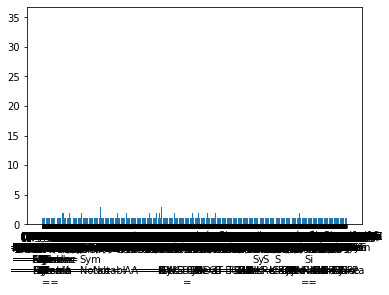

In [36]:
m=int(input("enter no of grams"))#n grams for english
print("m is :",m)
ngrams_1=Counter(ngrams(eng2,m))
keys,values=plothistogram1(ngrams_1)
combined = zip(keys, values) ## keys i.e. characters on x axis and their count in the given doc as values.
print("combined is :",combined)
zipped_sorted = sorted(combined, key=lambda x: x[0]) ## sorting based on keys, to get a to z order.
keys, values = map(list, zip(*zipped_sorted))
print("keys after sorting:",keys)
print("values after sorting :",values)
plt.bar(keys, values)
plt.show()


## Features of Images. 
### Images in digital format are stored as numeric values, and hence we can use these values as features. for ex : a black and white (binary) image is stored as an array of 0  and 255 or 0 and 1.

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [46]:
from keras.datasets import mnist
 
#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()



11501568/11490434 [==============================] - 0s 0us/step


Extract a subset of the data for our experiment:

In [47]:
no1 = train_X[train_y==1,:,:] ## dataset corresponding to number = 1.
no0 = train_X[train_y==0,:,:] ## dataset corresponding to number = 0.

Let us visualize a few images here:

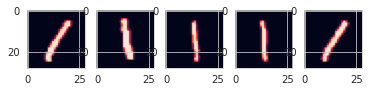

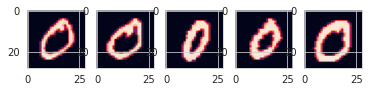

In [48]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

In [49]:
a = no1>0
a.shape, no1.shape

((6742, 28, 28), (6742, 28, 28))

In [50]:
## to help you understand how the np.sum is working to find count of pixels that are not zero.

mtx = np.arange(8).reshape(2,2,2)
a = mtx>1
a[0][0][0]
type(a[0][0][0])


numpy.bool_

## We can even use value of each pixel as a feature. But let us see how to derive other features.

Now, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [51]:
## sum of pixel values.

sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

In [52]:
sum1.shape

(6742,)

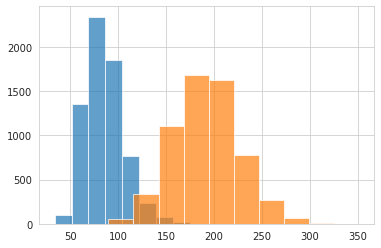

In [53]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);



We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [54]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  #print(img2)
  img2 = img2>0
  #print(img2)
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole




Visualize a few:

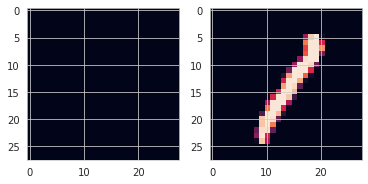

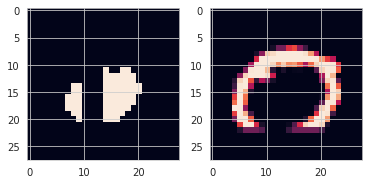

In [55]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

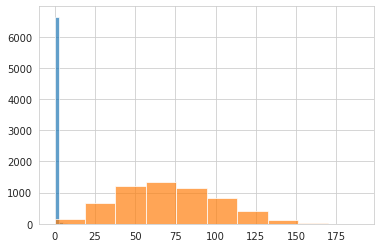

In [56]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])
  
plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero. 


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [57]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

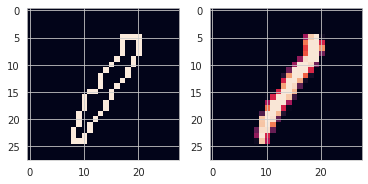

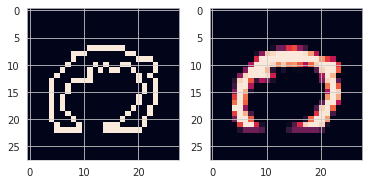

In [58]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

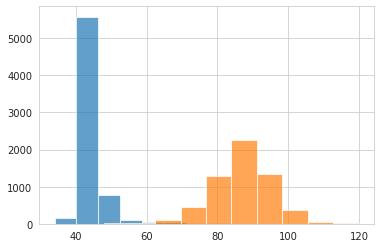

In [59]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together? 

Feel free to explore the above graph with your mouse. 


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?

Which is the best combination of features?


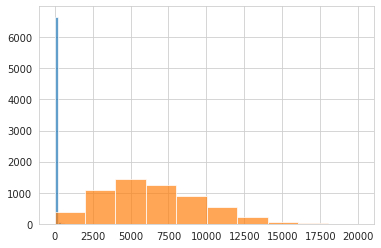

In [60]:
new1 = hole1*bound1
new0 = hole0*bound0
plt.hist(new1,  alpha=0.7);
plt.hist(new0, alpha=0.7);

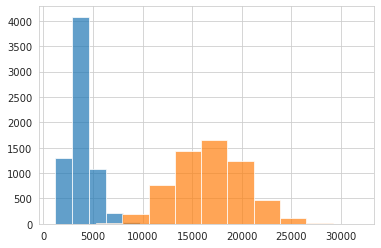

In [62]:
new1 = sum1 * bound1
new0 = sum0 * bound0
plt.hist(new1, alpha=0.7);
plt.hist(new0, alpha=0.7);

How would you test or visualize four or more features?


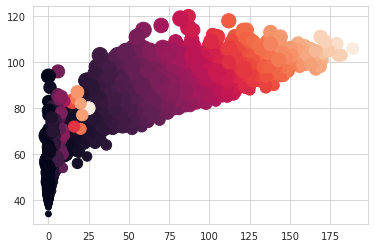

In [61]:
plt.scatter(hole0,bound0,sum0,new0)
plt.scatter(hole1,bound1,sum1,new1)

using average

In [63]:
## average of pixel values
avg1 = np.average(no0>0, (1,2))
avg0 = np.average(no1>0, (1,2))

(array([9.700e+01, 1.351e+03, 2.344e+03, 1.849e+03, 7.690e+02, 2.380e+02,
        7.400e+01, 1.500e+01, 2.000e+00, 3.000e+00]),
 array([0.04336735, 0.06581633, 0.08826531, 0.11071429, 0.13316327,
        0.15561224, 0.17806122, 0.2005102 , 0.22295918, 0.24540816,
        0.26785714]),
 <a list of 10 Patch objects>)

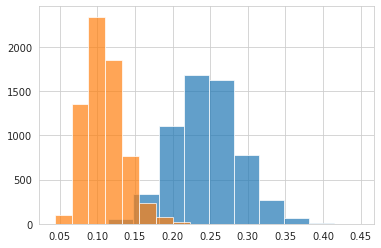

In [64]:
plt.hist(avg1, alpha=0.7)
plt.hist(avg0, alpha=0.7)

(array([  60.,  523., 1389., 1705., 1384.,  769.,  307.,  104.,   17.,
           7.]),
 array([ 60. ,  78.9,  97.8, 116.7, 135.6, 154.5, 173.4, 192.3, 211.2,
        230.1, 249. ]),
 <a list of 10 Patch objects>)

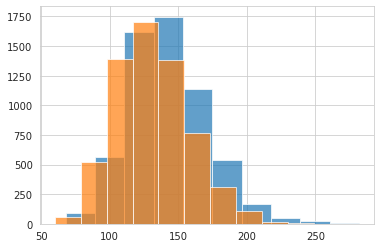

In [70]:
# lets consider datasets of 9 and 7 nand apply these features
no2 = train_X[train_y==9,:,:]
no3 = train_X[train_y==7,:,:]
sum2 = np.sum(no2>0, (1,2))
sum3 = np.sum(no3>0, (1,2))
plt.hist(sum2, alpha=0.7)
plt.hist(sum3, alpha=0.7)

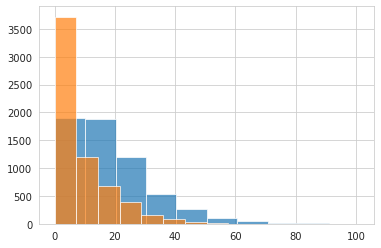

In [71]:
hole2 = np.array([getHolePixels(i).sum() for i in no2])
hole3 = np.array([getHolePixels(i).sum() for i in no3])
  
plt.hist(hole2, alpha=0.7);
plt.hist(hole3, alpha=0.7);

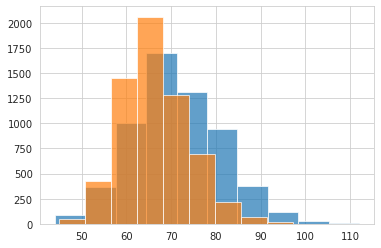

In [72]:
bound2 = np.array([getBoundaryPixels(i).sum() for i in no2])
bound3= np.array([getBoundaryPixels(i).sum() for i in no3])

plt.hist(bound2, alpha=0.7);
plt.hist(bound3, alpha=0.7);

(array([  60.,  523., 1389., 1705., 1384.,  769.,  307.,  104.,   17.,
           7.]),
 array([0.07653061, 0.10063776, 0.1247449 , 0.14885204, 0.17295918,
        0.19706633, 0.22117347, 0.24528061, 0.26938776, 0.2934949 ,
        0.31760204]),
 <a list of 10 Patch objects>)

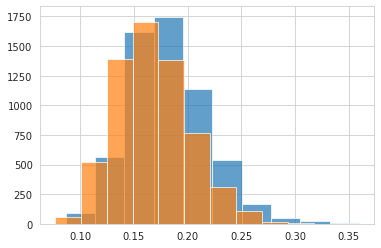

In [73]:
avg2 = np.average(no2>0, (1,2))
avg3 = np.average(no3>0, (1,2))
plt.hist(avg2, alpha=0.7)
plt.hist(avg3, alpha=0.7)

(array([  60.,  523., 1389., 1705., 1384.,  769.,  307.,  104.,   17.,
           7.]),
 array([0.07653061, 0.10063776, 0.1247449 , 0.14885204, 0.17295918,
        0.19706633, 0.22117347, 0.24528061, 0.26938776, 0.2934949 ,
        0.31760204]),
 <a list of 10 Patch objects>)

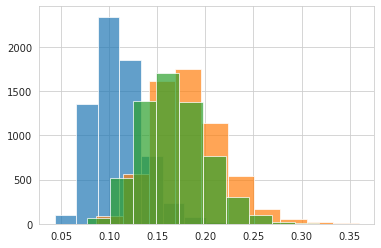

In [74]:
#What will happen if we take more that two classes at a time?
avg1 = np.average(no1>0, (1,2))
avg2 = np.average(no2>0, (1,2))
avg3 = np.average(no3>0, (1,2))
plt.hist(avg1, alpha=0.7)
plt.hist(avg2, alpha=0.7)
plt.hist(avg3, alpha=0.7)

there may rise collisions so that the output may be not exactly determine which number it is .


## Features from CSV file

In [ ]:
import pandas as pd

df = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [ ]:
df.head()


In [ ]:
df.columns


In [ ]:
df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['total_bedrooms'][:50]
y = df['housing_median_age'][:50]
z = df['median_house_value'][:50]

ax.set_xlabel("total_bedrooms")
ax.set_ylabel("housing_median_age")
ax.set_zlabel("median_house_value")

ax.scatter(x, y, z)

plt.show()

In [ ]:
## Task :
## Download a CSV file from the internet, upload it to your google drive.
## Read the CSV file and plot graphs using different combination of features and write your analysis
## Ex : IRIS flower datasaet

## Augmentation
It is a technique to increase the diversity of our training set by applying random (but realistic) transformations, such as image rotation, change of color etc. When we have limited training data, we can augment our data with help of these techniques.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
# set randomseed
rng = np.random.default_rng(seed=42)
from sklearn.utils.extmath import cartesian
from skimage.transform import rotate, AffineTransform, warp
import math

For this lab we will use a subset of MNIST that is very small, to better understand the effect of augmentation.

In [ ]:
#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X/255
test_X = test_X/255

print("original data size:",train_X.shape)


In [ ]:
print(train_X[0].shape,train_y[0])

In [ ]:
plt.imshow(train_X[0])

In [ ]:
train_X = train_X[::1200,:,:].copy() # subsample. Otherwise it will take too long!
train_y = train_y[::1200].copy() # do the same to the labels

print("Now it is:", train_X.shape)

Augmentation 1: rotation
Let us try rotating the image a little. We will use skimage library for this.

In [ ]:
plt.imshow(train_X[2], cmap='gray')
plt.show()
print(train_X[2].shape)
plt.imshow(rotate(train_X[2],45), cmap='gray')

After rotating, the the class of the image is still the same. Let us make a function to rotate multiple images by random angles. We want a slightly different image every time we run this function. So, we generate a random number between 0 and 1 and change it so that it lies between -constraint/2 and +constraint/2

In [ ]:
def augRotate(sample, angleconstraint):
  if angleconstraint==0:
    return sample

  print("shape of sample before is:", sample.shape)
  print("len(sample.shape)", len(sample.shape))
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)  # make sure the sample is 3 dimensional
    print("shape of sample is:", sample.shape)
  angle = rng.random(len(sample)) # generate random numbers for angles
  print("angle is:", angle)
  angle = (angle-0.5)*angleconstraint # make the random angle constrained
  print("angle with constraint is:", angle)
  nsample = sample.copy() # preallocate the augmented array to make it faster
  for ii in range(len(sample)):
    nsample[ii] = rotate(sample[ii], angle[ii])
  return np.squeeze(nsample) # take care if the input had only one sample.

This function returns a slightly different image each time we call it. So we can increase the number of images in the sample by any multiple. 

In [ ]:
sample = train_X[20]
angleconstraint = 70
# show the original image
plt.imshow(sample, cmap='gray')
plt.show()
plt.subplot(1,3,1)
plt.imshow(augRotate(sample, angleconstraint), cmap='gray') # show an augmented image
plt.subplot(1,3,2)
plt.imshow(augRotate(sample, angleconstraint), cmap='gray') # show another augmented image from the same sample
plt.subplot(1,3,3)
plt.imshow(augRotate(sample, angleconstraint), cmap='gray') # one more image from the same sample

Let us try one more augmentation, Shear: A transformation in which all points along a given line remain fixed while other points are shifted parallel to by a 
 distance proportional to their perpendicular distance from. Shearing a plane figure does not change its area. 

In [ ]:
def shear(sample, amount):
  tform = AffineTransform(shear = amount) # create the shear transform
  img = warp(sample, tform) # apply the shear
  # this makes the digit off-center. Since all the images in the test set are centralized, we will do the same here
  col = img.sum(0).nonzero()[0]
  row = img.sum(1).nonzero()[0]
  if len(col)>0 and len(row)>0:
    xshift = int(sample.shape[0]/2 - (row[0]+row[-1])/2)
    yshift = int(sample.shape[1]/2 - (col[0]+col[-1])/2)
    img = np.roll(img, (xshift, yshift),(0,1))
  return img

In [ ]:
sample = train_X[2]
plt.imshow(sample, cmap='gray')
plt.show()

# apply shear
plt.imshow(shear(sample, 0.4), cmap='gray')

## Let us also see skeletonization of image

In [ ]:
from skimage.morphology import skeletonize


In [ ]:
skeleton = skeletonize(train_X[2],method='lee')
plt.imshow(skeleton, cmap='gray')

In [ ]:
#Structuring elements that are repeatedly used for thinning

S1 = np.array([[0,0,0],[-1,1,-1],[1,1,1]]) # -1 for dont care
S2 = np.array([[-1,0,0],[1,1,0],[-1,1,-1]])


def CheckMatch(window,kernel):
  for i in range(window.shape[0]):
        for j in range(window.shape[1]):
            if kernel[i,j]!=-1 and window[i,j]!=kernel[i,j]:
                return False
  return True

def ApplyKernel(image,kernel): #used
  height, width =  image.shape
  res = np.copy(image)
  for i in range(1,height-1):
    for j in range (1,width-1):
      window = image[i-1:i+2,j-1:j+2]
      #print('window shape',window.shape)
      Match_result = CheckMatch(window,kernel)
      if (Match_result):
        res[i,j]=0
  return res



def Skeletonization(image):
  '''pass binary image'''
  #new = np.copy(image)
  #old = np.zeros(image.shape,dtype=np.uint8)
  count = 1
  change = 1000
  while (change >0.01):
    print('count',count)
    new = image
    new = ApplyKernel(new,S1)
    new = ApplyKernel(new,S2)
    new = ApplyKernel(new,np.rot90(S1,1)) #90 degree rotate
    new = ApplyKernel(new,np.rot90(S2,1))
    new = ApplyKernel(new,np.rot90(S1,2)) # 180 degree rotate
    new = ApplyKernel(new,np.rot90(S2,2))
    new = ApplyKernel(new,np.rot90(S1,3)) # 270 degree rotate
    new = ApplyKernel(new,np.rot90(S2,3))
    count+= 1
    change = np.mean(np.abs(new-image))
    image = new
    plt.imshow(new,cmap='gray')
    plt.show()
  return new

In [ ]:
binarized  =( train_X[0] > 0 ).astype(np.uint8)

In [ ]:
skeleton_five = Skeletonization(binarized)

In [33]:
#iris dataset exploration
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/IRIS.csv')
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


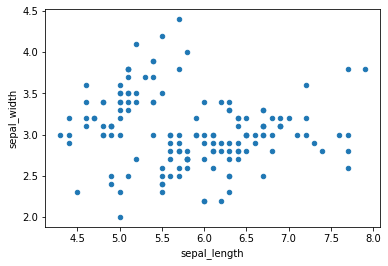

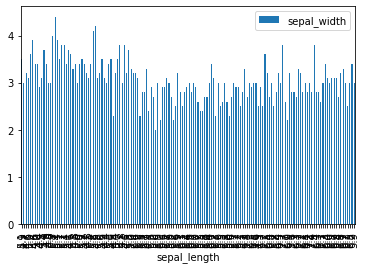

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df.plot(kind ='scatter', x='sepal_length', y='sepal_width')
df.plot(kind ='bar', x='sepal_length', y='sepal_width')

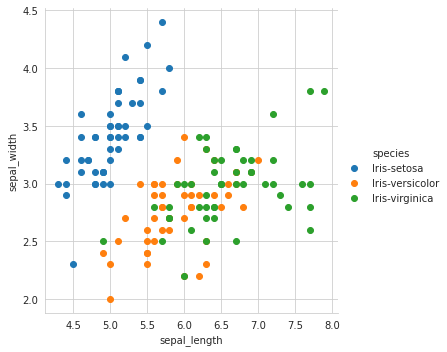

In [38]:
# 2-D plot with colour coding for each flower type/class
# hue='species' color the plot by the variety
sns.set_style('whitegrid');
sns.FacetGrid(df, hue='species',height=5)\
   .map(plt.scatter,'sepal_length','sepal_width')\
   .add_legend()
plt.show();

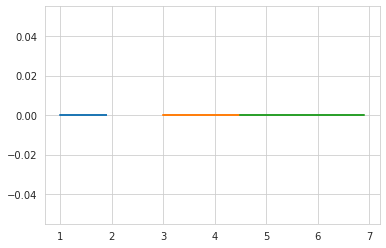

In [39]:
iris_setosa = df.loc[df['species'] == 'Iris-setosa']
iris_virginica = df.loc[df['species'] == 'Iris-virginica']
iris_versicolor = df.loc[df['species'] == 'Iris-versicolor']

#print(iris_sentosa['petal.length'])

plt.plot(iris_setosa['petal_length'],np.zeros_like(iris_setosa['petal_length']))
plt.plot(iris_versicolor['petal_length'],np.zeros_like(iris_versicolor['petal_length']))
plt.plot(iris_virginica['petal_length'],np.zeros_like(iris_virginica['petal_length']))

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

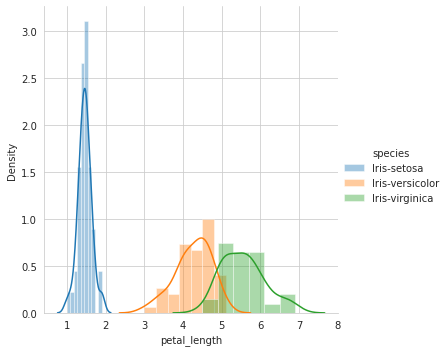

In [40]:
sns.FacetGrid(df, hue='species',height=5)\
   .map(sns.distplot, 'petal_length')\
   .add_legend()

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

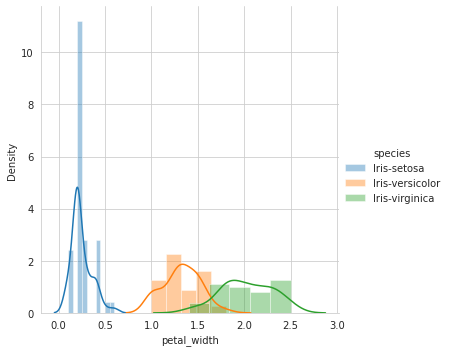

In [41]:
sns.FacetGrid(df, hue='species',height=5)\
   .map(sns.distplot, 'petal_width')\
   .add_legend()

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

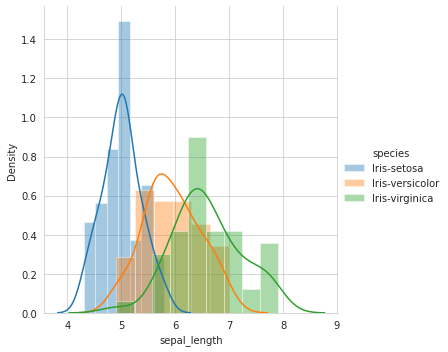

In [42]:
sns.FacetGrid(df, hue='species',height=5)\
   .map(sns.distplot, 'sepal_length')\
   .add_legend()

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

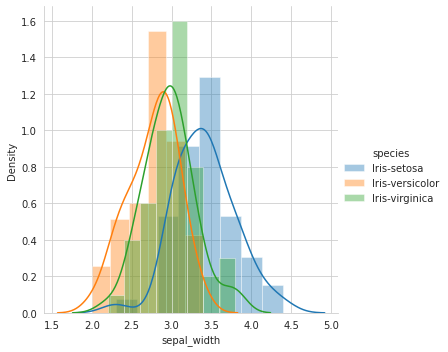

In [43]:
sns.FacetGrid(df, hue='species',height=5)\
   .map(sns.distplot, 'sepal_width')\
   .add_legend()

plt.show()

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]


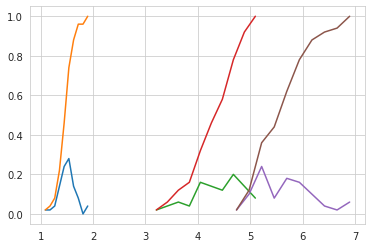

In [44]:
counts, bin_edges = np.histogram(iris_setosa['petal_length'],bins=10,
                                 density = True)

pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


# versicolor

counts, bin_edges = np.histogram(iris_versicolor['petal_length'],bins=10,
                                 density = True)

pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


# virginica

counts, bin_edges = np.histogram(iris_virginica['petal_length'],bins=10,
                                 density = True)

pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


plt.show()


Obervation(s): by plotting the PDF's for all 4 features we have seen that petal.length is perfrming well on separating the class.

petal.width is also somewhat performing well.

If we need to choose single feature to classify the new instance, it should be petal.length

if you want to classify based on two classes then it should be petal.length and petal.width